In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (11,5.5)

In [2]:
ogrenciler = pd.read_csv("StudentsPerformance.csv")
ogrenciler
ogrenciler.columns = ['cinsiyet', 'koken', 'aile_egt', 'ogle_yemegi', 'hz_kursu', 'mat_notu', 'okuma_notu', 'yazma_notu']
ogrenciler.head(22)

,cinsiyet,koken,aile_egt,ogle_yemegi,hz_kursu,mat_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


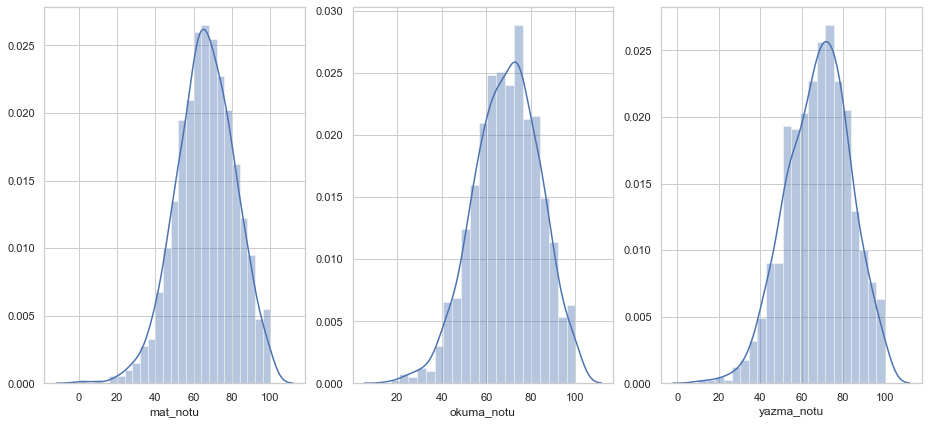

In [10]:
plt.figure(figsize=(13,6))
plt.subplot(131)
sns.distplot(ogrenciler['mat_notu'])

plt.subplot(132)
sns.distplot(ogrenciler['okuma_notu'])

plt.subplot(133)
sns.distplot(ogrenciler['yazma_notu'])

plt.tight_layout()
plt.show() #it seems that all three have mostly normal distribution but a little bit left-sided

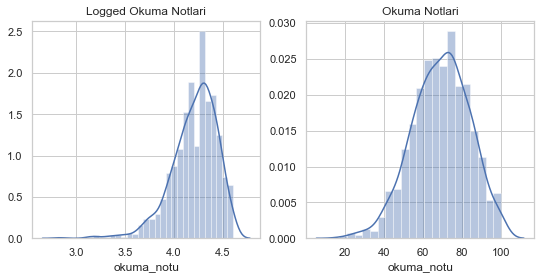

In [36]:
plt.figure(figsize=(9,4))
plt.subplot(121)
sns.distplot(np.log(ogrenciler['okuma_notu']))
plt.title('Logged Okuma Notlari')
plt.subplot(122)
sns.distplot(ogrenciler['okuma_notu'])
plt.title('Okuma Notlari')

plt.show()

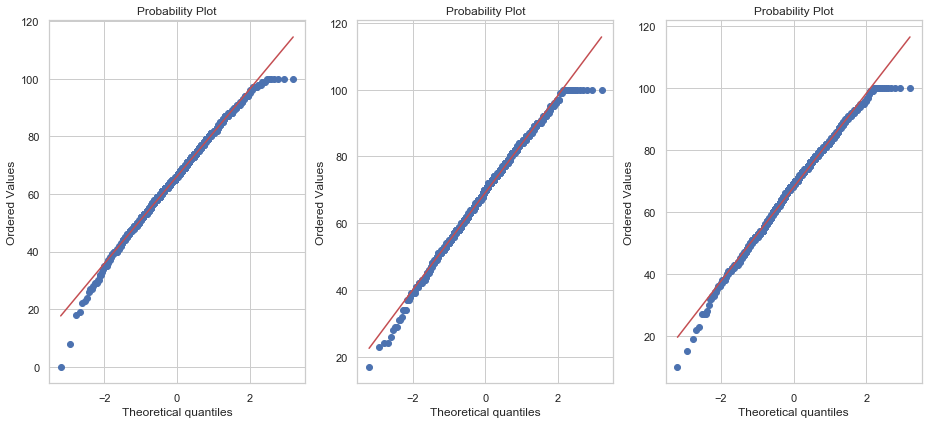

In [17]:
plt.figure(figsize=(13,6))
plt.subplot(131)
stats.probplot(ogrenciler['mat_notu'], plot=plt)

plt.subplot(132)
stats.probplot(ogrenciler['okuma_notu'], plot=plt)

plt.subplot(133)
stats.probplot(ogrenciler['yazma_notu'], plot=plt)
plt.tight_layout()
plt.show() # there are outliers, but not affect the distribution much
plt.show()

In [ ]:
# now let's combine all average of the scores into one column 

In [48]:
ogrenciler['ort_notlar'] = ogrenciler[['mat_notu','okuma_notu','yazma_notu']].mean(axis=1)
ogrenciler

,cinsiyet,koken,aile_egt,ogle_yemegi,hz_kursu,mat_notu,okuma_notu,yazma_notu,ort_notlar
0,female,group B,bachelor's degree,standard,none,72,72,74,72.667
1,female,group C,some college,standard,completed,69,90,88,82.333
2,female,group B,master's degree,standard,none,90,95,93,92.667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333
4,male,group C,some college,standard,none,76,78,75,76.333
5,female,group B,associate's degree,standard,none,71,83,78,77.333
6,female,group B,some college,standard,completed,88,95,92,91.667
7,male,group B,some college,free/reduced,none,40,43,39,40.667
8,male,group D,high school,free/reduced,completed,64,64,67,65.000
9,female,group B,high school,free/reduced,none,38,60,50,49.333


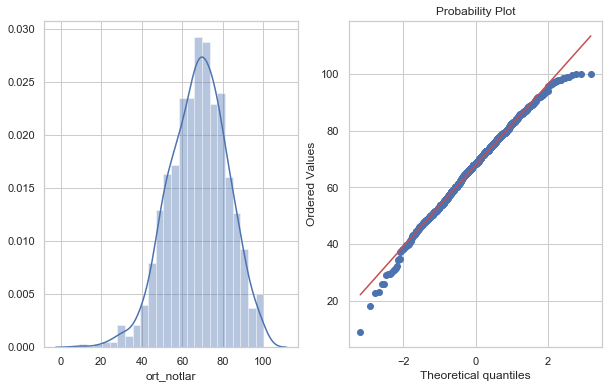

In [50]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.distplot(ogrenciler.ort_notlar)

plt.subplot(122)
stats.probplot(ogrenciler['ort_notlar'], plot=plt)

plt.show() #the new column has most likely normal distribution